In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("C:\\Users\\jacob\\Desktop\\PythonProjects\\Python_Project_1\\datasets_fun\\lego_colors.csv")

In [4]:
df.head() #

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [12]:
X = pd.get_dummies(df.drop(['id', 'rgb','is_trans'], axis=1))
X = X.astype('float32')
y = df['is_trans'].apply(lambda x: 1 if x=='t' else 0)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [21]:
len(X_train.columns)

135

In [19]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [23]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=len(X_train.columns)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [24]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics='accuracy')

In [25]:
history = model.fit(X_train, y_train, epochs=200, batch_size=32)

Epoch 1/200
4/4 [==============================] - 1s 6ms/step - loss: 0.6631 - accuracy: 0.8148
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 0.6564 - accuracy: 0.8148
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6510 - accuracy: 0.8148
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6449 - accuracy: 0.8241
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 0.6386 - accuracy: 0.8241
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6328 - accuracy: 0.8241
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6269 - accuracy: 0.8241
Epoch 8/200
4/4 [==============================] - 0s 5ms/step - loss: 0.6207 - accuracy: 0.8241
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6152 - accuracy: 0.8241
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6103 - accuracy: 0.8241
Epoch 11/200
4/4 [===========

<Axes: >

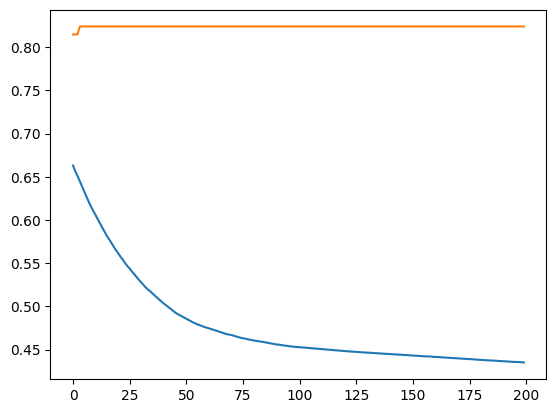

In [26]:
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot()
history_df['accuracy'].plot()

In [30]:
y_hat = model.predict(X_test)
print(y_hat)

1/1 [==============================] - 0s 40ms/step
[[0.16464676]
 [0.1916165 ]
 [0.15809456]
 [0.163423  ]
 [0.15271555]
 [0.20416568]
 [0.15781964]
 [0.1785651 ]
 [0.17445576]
 [0.15468869]
 [0.16734123]
 [0.1740875 ]
 [0.16852014]
 [0.15727021]
 [0.1795124 ]
 [0.19673851]
 [0.17490341]
 [0.17448345]
 [0.16824144]
 [0.16050243]
 [0.17687088]
 [0.17534298]
 [0.164025  ]
 [0.14033413]
 [0.15982859]
 [0.15086603]
 [0.17477739]]
